Going through the iris dataset in the ski-learn and doing a little Machine larning

In [1]:

from sklearn.datasets import load_iris
iris_dataset = load_iris()
'''Printing the keys of the iris_dataset'''
print("keys of iris-dataset: \n{}".format(iris_dataset.keys()))

keys of iris-dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [2]:
'''printing a specific keys and some short description'''
print(iris_dataset['DESCR'][:] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
'''Printing target namesand the keys '''
print("Target names: {}".format(iris_dataset['target_names'])) #this are the species of the iris flower 

Target names: ['setosa' 'versicolor' 'virginica']


In [4]:
'''Printing data and its item'''
print(iris_dataset['data'][:5])
'''printing the shape of date'''
print("\nprinting the shape of data: {} ".format(iris_dataset['data'].shape))

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]

printing the shape of data: (150, 4) 


In [5]:
'''printing target andits item'''
print(iris_dataset['target'][:5])

[0 0 0 0 0]


In [6]:
'''printing features-namesand its properties'''
print(iris_dataset['feature_names'][:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
'''splitting data for training and testing using scikit-learn function'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0) #the testing set s selected randomly

In [8]:
'''Outputing the training set data'''
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


Looking at the shape of the testing set 

In [9]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


Visualizing data helps one inspect data and see if it has abnormalities 

In [10]:
import pandas as pd 
import mglearn
import matplotlib.pyplot as plt
#conert the numpy array t a pandas array 
#create a dataframe for X-train 
#label the column using the iris_dataset.features-name
iris_dataframe = pd.DataFrame(X_train,columns=iris_dataset.feature_names) 
#create a scatter matrix from the dataframe , color by y-train
graph = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15),marker='o',
                         hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

/home/ghollah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  # Remove the CWD from sys.path while we load stuff.


Building a prediction model using k-nearest-neighbours model

In [11]:
'''with k-neighbour algorithm the model makes prediction based on any number of fixed points to determine the new data point '''
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) # this model uses only one neighbor

To build a model on training set we call the fit() method 

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

creating an array  with a flower with our measurements to make prediction on using iris_dataset

In [13]:
import numpy as np 
#creating a new numpy array
X_new = np.array([[4,2.9,1,3]])
#checking the shape of the array
print("X_new shape: {}".format(X_new.shape))


X_new shape: (1, 4)


In [14]:
'''making prediction'''
prediction = knn.predict(X_new)
print("prediction: {}".format(prediction))
print("predicted target names: {}".format(
iris_dataset['target_names'][prediction]))

prediction: [0]
predicted target names: ['setosa']


#evaluating the model

In [15]:
# we can measure how well the model works by computing the accuracy

In [16]:
y_pred = knn.predict(X_test)
print("Test set prediction:\n {}".format(y_pred))

Test set prediction:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [17]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


we can use the score() to test

In [18]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


This means that our test was 0.97% which is around 97% accurate

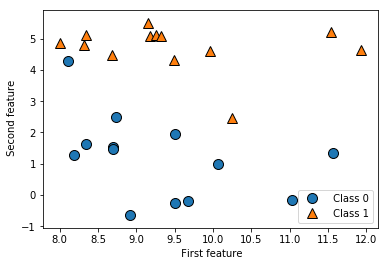

X.shape: (26, 2)


In [24]:
# generate dataset
X,y = mglearn.datasets.make_forge()
# plot the dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend([" Class 0", " Class 1"], loc=4)
plt.xlabel(" First feature")
plt.ylabel(" Second feature")
plt.show()
print("X.shape: {}".format(X.shape))


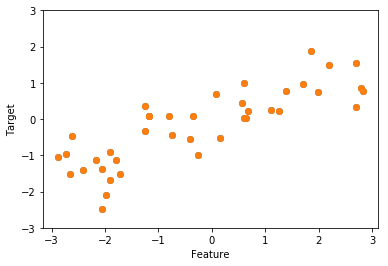

In [23]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()